In [1]:
from scipy import stats
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import pandas as pd

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

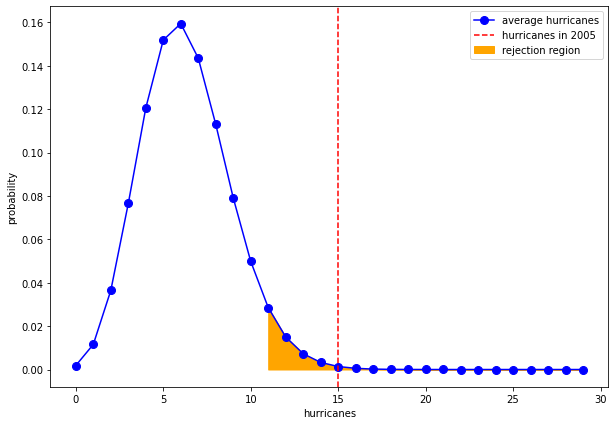

p value poisson:  0.0008444930803583883
Via looking the p value and the probablity of observing 15 hurricanes in a single year, we can reject the null hypothesis.
When we compare the average observation per year and observed hurricanes in 2005, the difference between them is huge.
z score:  3.4661629670697414
p value z test:  0.0005279431738299246
In this case, we can still reject the null hypothesis


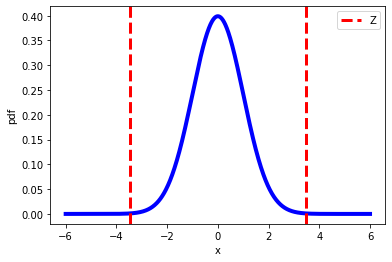

In [2]:


x0 = 15
mu = 6.3 
x = np.linspace(0, 29, 30)
y = stats.poisson.pmf(x, mu)

a = 0.05
c = x[y.cumsum() < 1 - a][-1] + 1 # reject boundary
p_value = 1 - stats.poisson.cdf(x0, mu)

fig, ax = plt.subplots(figsize=(10, 7))
plt.ylabel("probability")
plt.xlabel("hurricanes")
plt.plot(x, y, marker="o", markersize = 8, label = "average hurricanes", color = "blue")
plt.fill_between(x, y, where = x >= c, color = "orange", label = "rejection region")
plt.axvline(x0, linestyle = "dashed", color='r', label = "hurricanes in 2005")
plt.legend()
plt.show()

print("p value poisson: ", p_value)
print("Via looking the p value and the probablity of observing 15 hurricanes in a single year, we can reject the null hypothesis.")
print("When we compare the average observation per year and observed hurricanes in 2005, the difference between them is huge.")

sigma = np.sqrt(6.3)
z_score = abs(x0 - mu) / sigma
print("z score: ", z_score)


xs = np.linspace(-6, 6, 1000)
y = stats.norm.pdf(xs)

p_value2 = stats.norm.cdf(-1*z_score) + (1 - stats.norm.cdf(z_score))
print("p value z test: ", p_value2)
print("In this case, we can still reject the null hypothesis")

plt.plot(xs, y, color = "blue", linewidth = 4)
plt.ylabel("pdf")
plt.xlabel("x")
plt.axvline(z_score, linestyle="dashed", color='red', linewidth = 3, label = "Z")
plt.axvline(-1*z_score, linestyle="dashed", color='red', linewidth = 3)
plt.fill_between(xs, y, where = abs(xs) > abs(z_score), color="orange")
plt.legend()
plt.show()

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -3.786997938137629


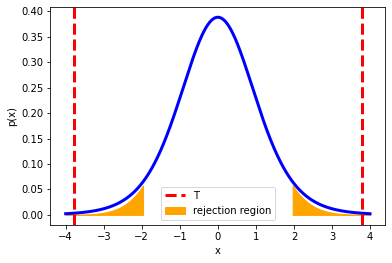

p value:  0.004302464132864604
p value is less than the significance level of 0.05. we reject the null hypothesis. The change in the blood pressure is meaningful.


In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre)

sigma_pre = np.var(pre, ddof = 1)
sigma_post = np.var(post, ddof = 1)
sigma = np.sqrt((sigma_pre + sigma_post)/2)

pre_mean = np.mean(pre)
post_mean = np.mean(post)

# calculate the test statistics
T = (pre_mean - post_mean) / (sigma * np.sqrt(2/n))
print("T =", T)

x = np.linspace(-4, +4, 1000)
y = stats.t.pdf(x, n - 1)
plt.plot(x, y, color = "blue", linewidth = 3)
plt.axvline(T, linestyle="dashed", color = 'red', linewidth = 3, label = "T")
plt.axvline(-T, linestyle="dashed", color = 'red', linewidth = 3)
plt.fill_between(x[x < -1*1.96], stats.norm.pdf(x[x < -1*1.96], 0, 1), color = "orange", label= "rejection region") #1.96: normal dist confidence interval
plt.fill_between(x[x > 1.96], stats.norm.pdf(x[x > 1.96], 0, 1), color = "orange") 
plt.ylabel("p(x)")
plt.xlabel("x")
plt.legend()
plt.show()

p_value = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p value: ", p_value)
print("p value is less than the significance level of 0.05. we reject the null hypothesis. The change in the blood pressure is meaningful.")

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

    # year     hare     lynx  carrot
0     1900  30000.0   4000.0   48300
1     1901  47200.0   6100.0   48200
2     1902  70200.0   9800.0   41500
3     1903  77400.0  35200.0   38200
4     1904  36300.0  59400.0   40600
5     1905  20600.0  41700.0   39800
6     1906  18100.0  19000.0   38600
7     1907  21400.0  13000.0   42300
8     1908  22000.0   8300.0   44500
9     1909  25400.0   9100.0   42100
10    1910  27100.0   7400.0   46000
11    1911  40300.0   8000.0   46800
12    1912  57000.0  12300.0   43800
13    1913  76600.0  19500.0   40900
14    1914  52300.0  45700.0   39400
15    1915  19500.0  51100.0   39000
16    1916  11200.0  29700.0   36700
17    1917   7600.0  15800.0   41800
18    1918  14600.0   9700.0   43300
19    1919  16200.0  10100.0   41300
20    1920  24700.0   8600.0   47300


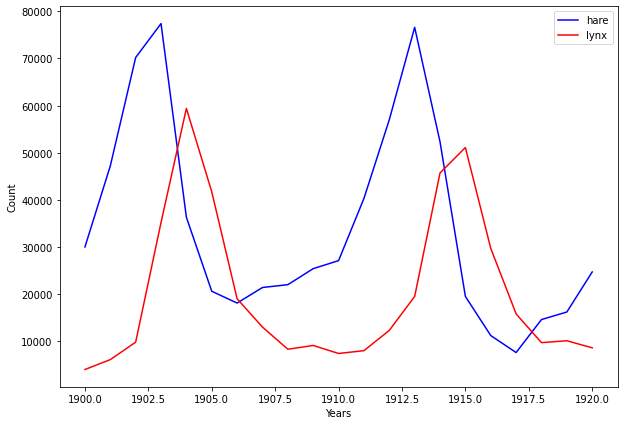

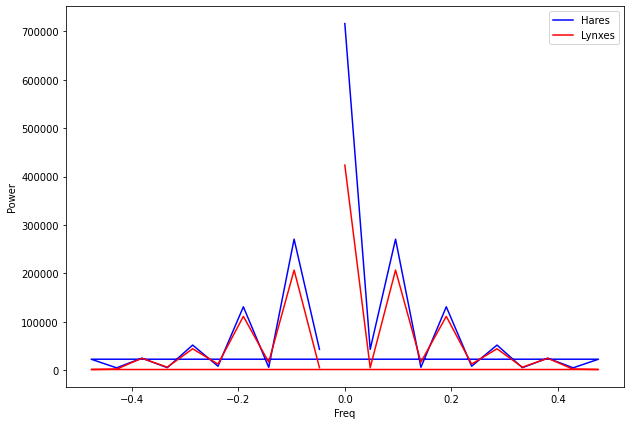

Period of hares:  10.5
Period of lynxes:  10.5


In [4]:
data = pd.read_csv("populations.txt", delimiter = "\t")
print(data)

hare = np.array(data["hare"])
lynx = np.array(data["lynx"])
year = np.array(data["# year"])

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(year, hare, label = "hare", color = "blue")
plt.plot(year, lynx, label = "lynx", color = "red")
plt.xlabel('Years')
plt.ylabel('Count')
plt.legend()
plt.show()

from scipy.fftpack import fft, fftfreq

fft_hares = fft(hare)
fft_lynxes = fft(lynx)

power_hares = np.abs(fft_hares)
power_lynxes = np.abs(fft_lynxes)
    
sample_freqs = fftfreq(len(year))    

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(sample_freqs, power_hares, label = "Hares", color = "blue")
plt.plot(sample_freqs, power_lynxes, label = "Lynxes", color = "red")
plt.xlabel('Freq')
plt.ylabel('Power')
plt.legend()
plt.show()
mask = np.where(sample_freqs > 0)
freqs = sample_freqs[mask]
peak_hares = freqs[power_hares[mask].argmax()]
peak_lynxes = freqs[power_lynxes[mask].argmax()]

print("Period of hares: ", 1/peak_hares)
print("Period of lynxes: ", 1/peak_lynxes)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

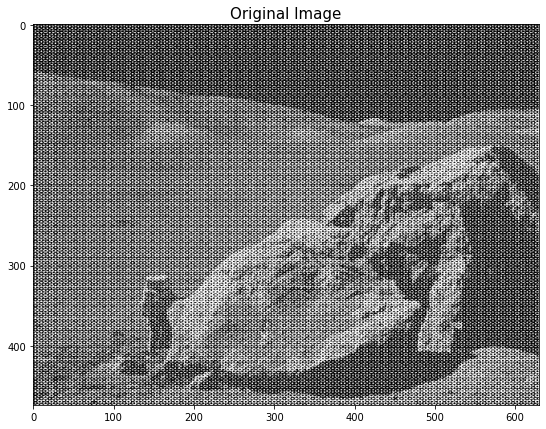

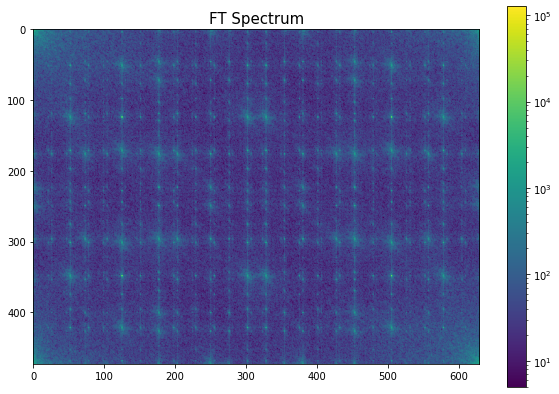

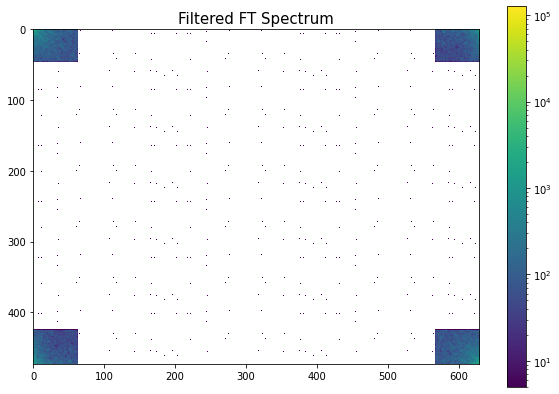

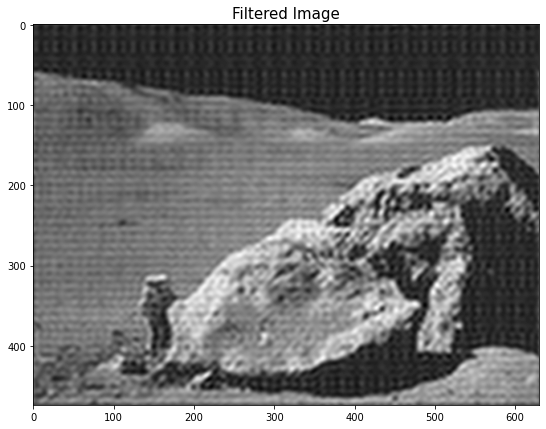

In [5]:
import numpy as np
import matplotlib.pyplot as plt

image = plt.imread('moonlanding.png')
fig, ax = plt.subplots(figsize=(10, 7))
plt.imshow(image, cmap = "gray")
plt.title('Original Image', size = 15)
plt.show()

from scipy.fftpack import fft2, ifft2
from matplotlib.colors import LogNorm

fft_image = fft2(image)
fig, ax = plt.subplots(figsize=(10, 7))
plt.imshow(np.abs(fft_image), norm = LogNorm(vmin = 5))
plt.title('FT Spectrum', size = 15)
plt.colorbar()
plt.show()

keep_fraction = 0.1
rows, columns = fft_image.shape

# Setting row values to zero based on keep fraction value
fft_image[int(rows * keep_fraction): int(rows * (1 - keep_fraction))] = 0

# Setting column values to zero based on keep fraction value
fft_image[:, int(columns * keep_fraction): int(columns * (1-keep_fraction))] = 0

fig, ax = plt.subplots(figsize=(10, 7))
plt.imshow(np.abs(fft_image), norm = LogNorm(vmin = 5))
plt.title('Filtered FT Spectrum', size = 15)
plt.colorbar()
plt.show()

# Reconstructing the image from the filtered spectrum via keeping only real part
image_filtered = ifft2(fft_image).real

fig, ax = plt.subplots(figsize=(10, 7))
plt.title('Filtered Image', size = 15)
plt.imshow(image_filtered, plt.cm.gray)
plt.show()